# Lab 1: Data Analysis and Visualization  
**Name:** Pawan Pandey    
**Lab Title:** Data Visualization, Preprocessing, and Statistical Analysis Lab  
**Dataset:** Credit Card Fraud Detection (Kaggle)

## Step 1: Data Collection

In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv("creditcard.csv")
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Step 2: Data Visualization

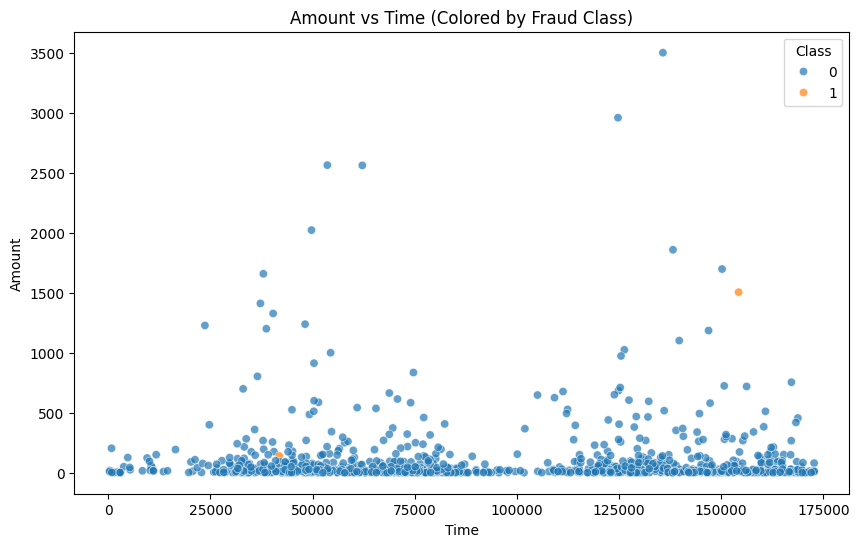

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot: Amount vs Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(1000), x='Time', y='Amount', hue='Class', alpha=0.7)
plt.title('Amount vs Time (Colored by Fraud Class)')
plt.show()

Most fraudulent transactions are clustered in certain time windows, and often with smaller amounts.

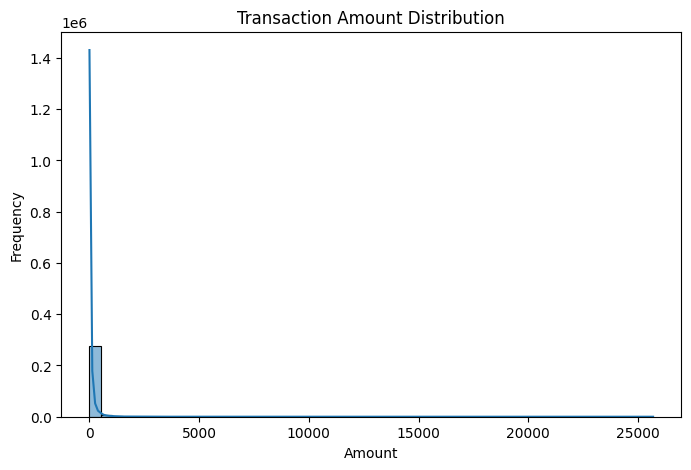

In [16]:
# Histogram: Distribution of Transaction Amount
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

The distribution is right-skewed, indicating most transactions are small in value.

## Step 3: Data Preprocessing

### 1. Handling Missing Values

In [6]:
df.isnull().sum()  # this dataset has no missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### 2. Outlier Detection

In [7]:
# Use IQR on 'Amount'
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(outliers.shape)

# Remove outliers
df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

(31904, 31)


### 3. Data Reduction

In [8]:
# Sample 50% of the data
df_sample = df.sample(frac=0.5, random_state=42)
print(df_sample.shape)

# Drop less relevant features like 'Time'
df_sample = df_sample.drop(columns=['Time'])

(126452, 31)


### 4. Data Scaling and Discretization

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_sample[['Amount']] = scaler.fit_transform(df_sample[['Amount']])

# Discretization
df_sample['Amount_bin'] = pd.cut(df_sample['Amount'], bins=3, labels=['Low', 'Medium', 'High'])
df_sample[['Amount', 'Amount_bin']].head()

,Amount,Amount_bin
210409,0.408672,Medium
166952,0.004824,Low
113757,0.031328,Low
6093,0.536585,Medium
19821,0.054146,Low


## Step 4: Statistical Analysis

### 1. General Overview

In [10]:
df_sample.info()
df_sample.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 126452 entries, 210409 to 43617
Data columns (total 31 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   V1          126452 non-null  float64 
 1   V2          126452 non-null  float64 
 2   V3          126452 non-null  float64 
 3   V4          126452 non-null  float64 
 4   V5          126452 non-null  float64 
 5   V6          126452 non-null  float64 
 6   V7          126452 non-null  float64 
 7   V8          126452 non-null  float64 
 8   V9          126452 non-null  float64 
 9   V10         126452 non-null  float64 
 10  V11         126452 non-null  float64 
 11  V12         126452 non-null  float64 
 12  V13         126452 non-null  float64 
 13  V14         126452 non-null  float64 
 14  V15         126452 non-null  float64 
 15  V16         126452 non-null  float64 
 16  V17         126452 non-null  float64 
 17  V18         126452 non-null  float64 
 18  V19         126452 non-nu

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,126452.000000,126452.000000,126452.000000,126452.000000,126452.000000,126452.000000,126452.000000,126452.000000,126452.000000,126452.000000,...,126452.000000,126452.000000,126452.000000,126452.000000,126452.000000,126452.000000,126452.000000,126452.000000,126452.000000,126452.000000
mean,0.101952,0.231744,0.056863,-0.019175,0.116054,-0.060627,-0.082949,0.023584,0.006794,0.023069,...,-0.017759,0.002565,0.005387,0.000200,0.002962,-0.000813,0.001883,-0.001460,0.189168,0.001716
std,1.810639,1.268576,1.472859,1.393961,1.202651,1.256726,1.035756,1.145604,1.080107,1.082739,...,0.701620,0.713112,0.446154,0.603939,0.504299,0.469616,0.370669,0.266066,0.228444,0.041390
min,-40.470142,-37.520432,-32.965346,-5.683171,-23.505167,-17.927274,-41.506796,-38.987263,-13.434066,-24.403185,...,-21.453736,-8.887017,-36.666000,-2.822684,-7.495741,-1.732008,-9.895244,-8.364853,0.000000,0.000000
25%,-0.853707,-0.398784,-0.822360,-0.848904,-0.565481,-0.794791,-0.575916,-0.197915,-0.615397,-0.510119,...,-0.237192,-0.543591,-0.141948,-0.355396,-0.312281,-0.322112,-0.064071,-0.054437,0.024336,0.000000
50%,0.041823,0.162620,0.220848,-0.025928,0.021807,-0.322613,0.015267,0.027774,-0.047096,-0.083858,...,-0.047649,0.006130,-0.004836,0.040109,0.013300,-0.041276,0.006656,0.008564,0.086721,0.000000
75%,1.362989,0.875321,1.064057,0.718228,0.668038,0.309532,0.517054,0.333790,0.581179,0.450512,...,0.158811,0.530420,0.141470,0.437841,0.349456,0.232203,0.095309,0.072202,0.270949,0.000000
max,2.454930,21.467203,4.101716,12.114672,25.604077,7.720919,6.491054,20.007208,10.392889,15.331742,...,27.202839,8.361985,22.083545,4.016342,6.070850,3.463246,6.578849,16.129609,1.000000,1.000000


### 2. Central Tendency

In [11]:
print("Min:", df_sample['Amount'].min())
print("Max:", df_sample['Amount'].max())
print("Mean:", df_sample['Amount'].mean())
print("Median:", df_sample['Amount'].median())
print("Mode:", df_sample['Amount'].mode()[0])

Min: 0.0
Max: 1.0
Mean: 0.18916756399398998
Median: 0.08672086720867209
Mode: 0.005420054200542005


### 3. Dispersion

In [12]:
range_val = df_sample['Amount'].max() - df_sample['Amount'].min()
Q1 = df_sample['Amount'].quantile(0.25)
Q3 = df_sample['Amount'].quantile(0.75)
IQR = Q3 - Q1
variance = df_sample['Amount'].var()
std_dev = df_sample['Amount'].std()

print("Range:", range_val)
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Variance:", variance)
print("Standard Deviation:", std_dev)

Range: 1.0
Q1: 0.024336043360433605
Q3: 0.27094850948509486
IQR: 0.24661246612466126
Variance: 0.05218660660018959
Standard Deviation: 0.22844388063633833


### 4. Correlation Matrix

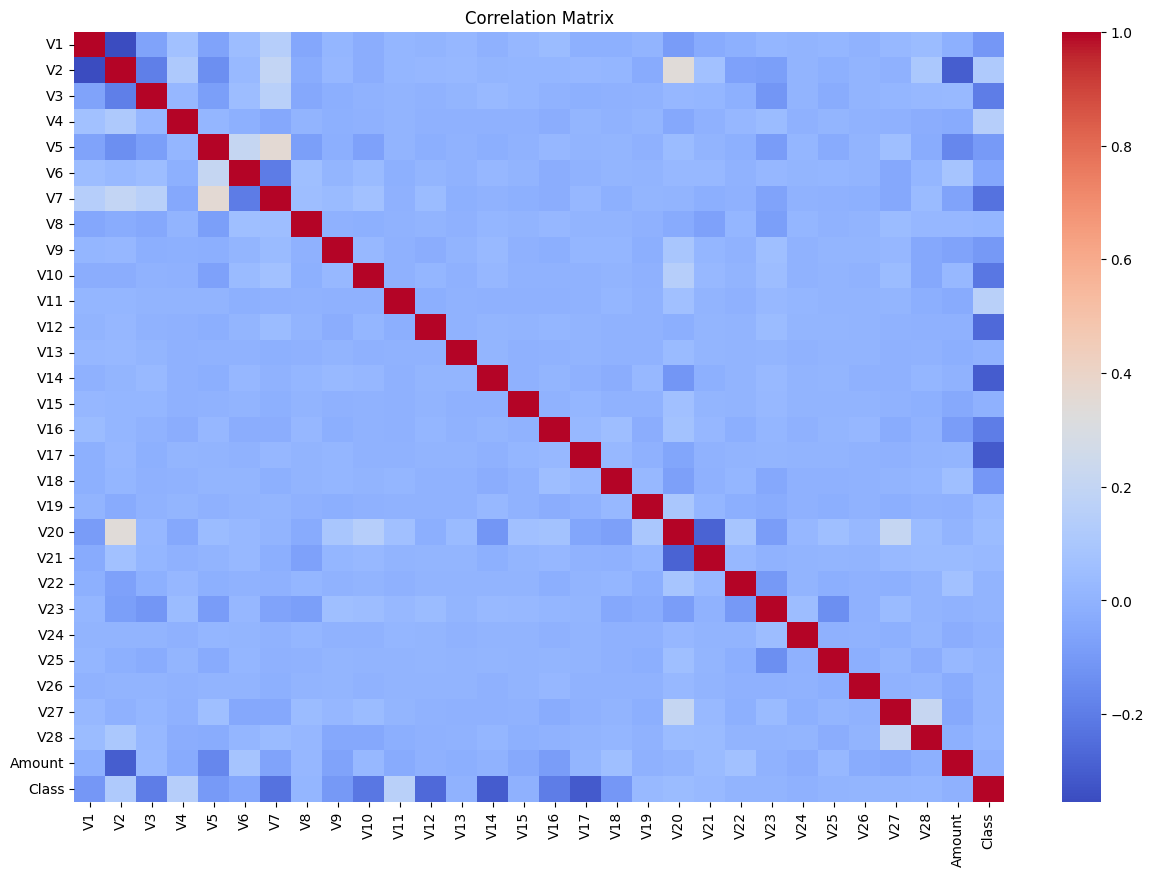

In [13]:
corr_matrix = df_sample.corr(numeric_only=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()